Base image shape: (404, 720, 3)
Overlay image shape: (719, 1080, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.870098].


Selected Points: [(232, 86), (476, 85), (229, 234), (476, 235)]
Homography matrix:
 [[ 2.20085070e-01 -8.04085747e-03  2.32000000e+02]
 [-1.96893587e-03  2.01888588e-01  8.60000000e+01]
 [-1.22707053e-05 -1.68925577e-05  1.00000000e+00]]


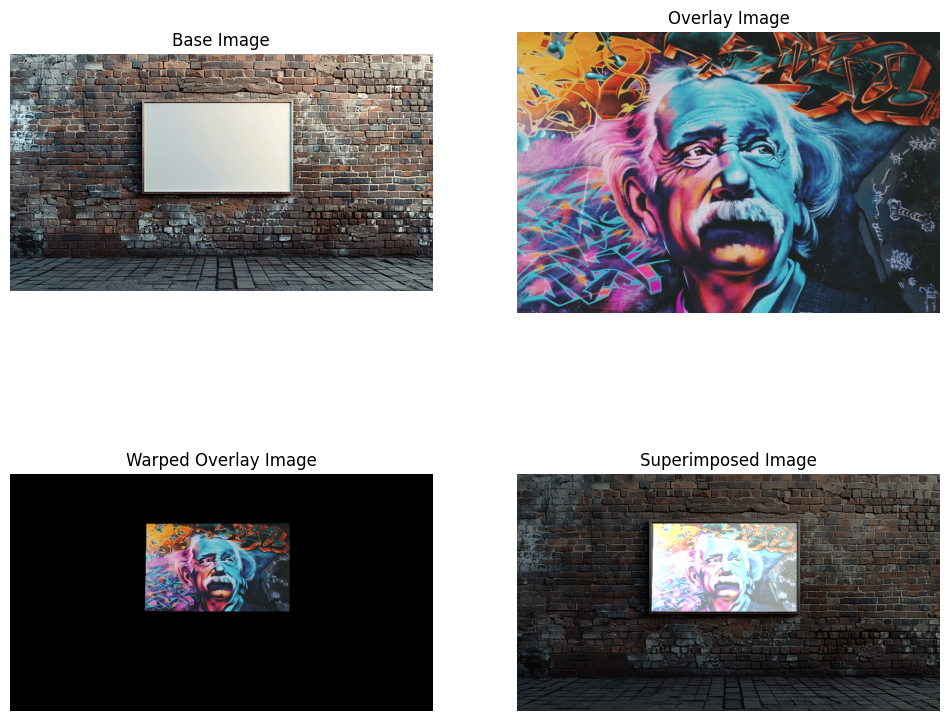

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize a list to store the selected points
selected_points = []

# Callback function for mouse click events
def mouse_click(event, x, y, flags, param):
    global selected_points

    if event == cv2.EVENT_LBUTTONDOWN:
        selected_points.append((x, y))
        # Draw a circle temporarily on the copy image for visual feedback
        cv2.circle(base_image_copy, (x, y), 4, (0, 0, 255), -1)
        cv2.imshow('Base Image', base_image_copy)

# Load the base image and the image to be superimposed
base_image_path = 'AD.png' 
overlay_image_path = 'gold.png' 

# Attempt to load the images
base_image = cv2.imread(base_image_path)
overlay_image = cv2.imread(overlay_image_path)

# Check if the images were loaded successfully
if base_image is None:
    raise FileNotFoundError(f"Base image '{base_image_path}' not found or could not be loaded.")
if overlay_image is None:
    raise FileNotFoundError(f"Overlay image '{overlay_image_path}' not found or could not be loaded.")

# Convert images to float32 and normalize
base_image = base_image.astype(np.float32) / np.iinfo(base_image.dtype).max
overlay_image = overlay_image.astype(np.float32) / np.iinfo(overlay_image.dtype).max

# Make a copy of the base image to show points 
base_image_copy = base_image.copy()

# Print the shapes of both images
print("Base image shape:", base_image.shape)
print("Overlay image shape:", overlay_image.shape)

# Display the base image and set the mouse callback to select points
cv2.imshow('Base Image', base_image_copy)
cv2.setMouseCallback('Base Image', mouse_click)

# Wait for the user to select four points
while len(selected_points) < 4:
    cv2.waitKey(1)

# Close all OpenCV windows
cv2.destroyAllWindows()

# Print the selected points
print("Selected Points:", selected_points)

# Prepare the source (overlay image) and destination (selected) points for perspective transformation
dst_points = np.array(selected_points).astype(np.float32)
h_overlay, w_overlay = overlay_image.shape[:2]
src_points = np.float32([[0, 0], [w_overlay, 0], [0, h_overlay], [w_overlay, h_overlay]])

# Compute the homography matrix
H = cv2.getPerspectiveTransform(src_points, dst_points)
print('Homography matrix:\n', H)

# Warp the overlay image using the homography matrix to fit the base image
warped_overlay_image = cv2.warpPerspective(overlay_image, H, (base_image.shape[1], base_image.shape[0]))

# Combine the base image and the warped overlay image
superimposed_image = cv2.addWeighted(base_image, 0.5, warped_overlay_image,1.5, 0)
# Create a figure with a specified size
plt.figure(figsize=(12, 10))  # Adjust the size as needed (width, height)
# Display the images
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Base Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.title('Overlay Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(warped_overlay_image , cv2.COLOR_BGR2RGB))
plt.title('Warped Overlay Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(superimposed_image, cv2.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.axis('off')

plt.show()
